# Athletics

Ejercicio para ir probando técnicas de limpieza de datos, a partir de datos del mundial de atletismo (esto es mio)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
# Acá están los datos
carpeta = Path('data/athletics')
carpeta.exists()

True

In [3]:
archivos = list(carpeta.glob("*.csv"))
archivos[0]

PosixPath('data/athletics/545.csv')

Miremos como se compone cada archivo

In [4]:
df = pd.read_csv(archivos[0])
df 

,event,event_name,position,athelete,country,mark
0,"10,000 Metres men",11th IAAF World Championships in Athletics,1,Kenenisa BEKELE,ETH,27:05.90 SB
1,"10,000 Metres men",11th IAAF World Championships in Athletics,2,Sileshi Sihine,ETH,27:09.03
2,"10,000 Metres men",11th IAAF World Championships in Athletics,3,Martin Irungu Mathathi,KEN,27:12.17
3,"10,000 Metres men",11th IAAF World Championships in Athletics,4,Zersenay Tadese,ERI,27:21.37
4,"10,000 Metres men",11th IAAF World Championships in Athletics,5,Josphat Muchiri Ndambiri,KEN,27:31.41
5,"10,000 Metres men",11th IAAF World Championships in Athletics,6,Gebregziabher Gebremariam,ETH,27:44.58
6,"10,000 Metres men",11th IAAF World Championships in Athletics,7,Abdi ABDIRAHMAN,USA,27:56.62
7,"10,000 Metres men",11th IAAF World Championships in Athletics,8,Josphat Kiprono Menjo,KEN,28:25.67
8,"10,000 Metres men",11th IAAF World Championships in Athletics,9,Dathan Ritzenhein,USA,28:28.59 SB
9,"10,000 Metres men",11th IAAF World Championships in Athletics,10,Boniface Toroitich Kiprop,UGA,28:30.99


In [5]:
# me interesan todas las columnas realmente, así que no hay filtro por eso

#columna event, quiero separarla en dos, uno con el sexo de los competidores y otro con la competencia
df.event.str.split(pat=None, n=2, expand=True).iloc[:,2].astype('category')


0     men
1     men
2     men
3     men
4     men
5     men
6     men
7     men
8     men
9     men
10    men
11    men
12    men
13    men
14    men
15    men
16    men
17    men
Name: 2, dtype: category
Categories (1, object): ['men']

In [6]:
# que me quede los eventos sin el sexto 
df.event.str.split(pat=None, n=2, expand=True).iloc[:,:2].agg(' '.join , axis=1)

0     10,000 Metres
1     10,000 Metres
2     10,000 Metres
3     10,000 Metres
4     10,000 Metres
5     10,000 Metres
6     10,000 Metres
7     10,000 Metres
8     10,000 Metres
9     10,000 Metres
10    10,000 Metres
11    10,000 Metres
12    10,000 Metres
13    10,000 Metres
14    10,000 Metres
15    10,000 Metres
16    10,000 Metres
17    10,000 Metres
dtype: object

In [7]:
#de event_name solo quiero el número , usando regex
df.event_name.str.replace('\D','', regex=True).astype("int8")

0     11
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
17    11
Name: event_name, dtype: int8

In [8]:
# finalmente hay textos raros en las marcas que me voy a echar
# esto va a quedar raro, pero hay que tener cuidado después porque queda raro, pero prefiero guardarlo como int
df.mark.str.replace('\D','', regex=True).astype(int)

0     270590
1     270903
2     271217
3     272137
4     273141
5     274458
6     275662
7     282567
8     282859
9     283099
10    284171
11    285169
12    285175
13    285219
14    292472
15    292591
16    294817
17    303416
Name: mark, dtype: int64

In [9]:
# los nombres de los atletas capitalizados
df.athelete.str.upper()

0               KENENISA BEKELE
1                SILESHI SIHINE
2        MARTIN IRUNGU MATHATHI
3               ZERSENAY TADESE
4      JOSPHAT MUCHIRI NDAMBIRI
5     GEBREGZIABHER GEBREMARIAM
6               ABDI ABDIRAHMAN
7         JOSPHAT KIPRONO MENJO
8             DATHAN RITZENHEIN
9     BONIFACE TOROITICH KIPROP
10                   GALEN RUPP
11             KENSUKE TAKEZAWA
12                  TADESE TOLA
13             ALEJANDRO SUÁREZ
14     WILSON KIPKEMEI BUSIENEI
15                DICKSON MARWA
16               KAZUHIRO MAEDA
17                 MICHAEL AISH
Name: athelete, dtype: object

df.event.str.split()

In [10]:
def clean_competition(df):
    return (
        df.assign(
            sex = df.event.str.split(pat=None, n=2, expand=True).iloc[:,2],
            event = df.event.str.split(pat=None, n=2, expand=True).iloc[:,:2].agg(' '.join , axis=1).astype('category'),
            event_number = df.event_name.str.replace('\D','', regex=True).astype("int8"),
            mark = df.mark.str.replace('\D+','', regex=True).astype(int),
            athelete = df.athelete.str.upper(),
            position = df.position.astype("int8"))
        .drop(columns=["event_name"])
    )

In [11]:
clean_competition(df)

,event,position,athelete,country,mark,sex,event_number
0,"10,000 Metres",1,KENENISA BEKELE,ETH,270590,men,11
1,"10,000 Metres",2,SILESHI SIHINE,ETH,270903,men,11
2,"10,000 Metres",3,MARTIN IRUNGU MATHATHI,KEN,271217,men,11
3,"10,000 Metres",4,ZERSENAY TADESE,ERI,272137,men,11
4,"10,000 Metres",5,JOSPHAT MUCHIRI NDAMBIRI,KEN,273141,men,11
5,"10,000 Metres",6,GEBREGZIABHER GEBREMARIAM,ETH,274458,men,11
6,"10,000 Metres",7,ABDI ABDIRAHMAN,USA,275662,men,11
7,"10,000 Metres",8,JOSPHAT KIPRONO MENJO,KEN,282567,men,11
8,"10,000 Metres",9,DATHAN RITZENHEIN,USA,282859,men,11
9,"10,000 Metres",10,BONIFACE TOROITICH KIPROP,UGA,283099,men,11


In [12]:
all_competitions = list()
for archivo in archivos:
    print (archivo)
    all_competitions.append(clean_competition(pd.read_csv(archivo)))

data/athletics/545.csv
data/athletics/223.csv


IndexError: single positional indexer is out-of-bounds

Viendo los datos me parece que existen algunas competencias que no tienen sexo marcado, o algo así, porque ahí falla, vamos a probar

In [13]:
all_competitions = list()
for archivo in archivos:
    try:
        all_competitions.append(clean_competition(pd.read_csv(archivo)))
    except IndexError:
        archivo_malo = archivo
        break
print (archivo_malo)

data/athletics/223.csv


Veamos porque falla ese archivo

In [14]:
df = pd.read_csv(archivo_malo)
df

,event,event_name,position,athelete,country,mark
0,Marathon men,1st IAAF World Championships in Athletics,1,Robert de Castella,AUS,2:10:03
1,Marathon men,1st IAAF World Championships in Athletics,2,Kebede Balcha,ETH,2:10:27
2,Marathon men,1st IAAF World Championships in Athletics,3,Waldemar Cierpinski,GDR,2:10:37
3,Marathon men,1st IAAF World Championships in Athletics,4,Kjell-Erik Ståhl,SWE,2:10:38
4,Marathon men,1st IAAF World Championships in Athletics,5,Agapius Masong,TAN,2:10:42
...,...,...,...,...,...,...
58,Marathon men,1st IAAF World Championships in Athletics,59,Chang-Ming Chen,TPE,2:34:00
59,Marathon men,1st IAAF World Championships in Athletics,60,Agust Thorsteinsson,ISL,2:34:05
60,Marathon men,1st IAAF World Championships in Athletics,61,José Jaime Hernandez,ESA,2:34:26
61,Marathon men,1st IAAF World Championships in Athletics,62,Michael Lekhelsi,LES,2:52:01


Falla porque son sólo 2 palabras, Marathon men, habría que adaptar las columnas sex y event

In [15]:
df.event.str.split(pat=None, n=2, expand=True).iloc[:,-1]

0     men
1     men
2     men
3     men
4     men
     ... 
58    men
59    men
60    men
61    men
62    men
Name: 1, Length: 63, dtype: object

In [16]:
df.event.str.split(pat=None, n=2, expand=True).iloc[:,:-1].agg(' '.join , axis=1).astype('category')

0     Marathon
1     Marathon
2     Marathon
3     Marathon
4     Marathon
        ...   
58    Marathon
59    Marathon
60    Marathon
61    Marathon
62    Marathon
Length: 63, dtype: category
Categories (1, object): ['Marathon']

In [17]:
def clean_competition(df):
    return (
        df.assign(
            sex = df.event.str.split(pat=None, n=2, expand=True).iloc[:,-1].astype('category'),
            event = df.event.str.split(pat=None, n=2, expand=True).iloc[:,:-1].agg(' '.join , axis=1).astype('category'),
            event_number = df.event_name.str.replace('\D','', regex=True).astype("int8"),
            mark = df.mark.str.replace('\D+','', regex=True).astype(int),
            athelete = df.athelete.str.upper(),
            position = df.position.astype("int8"))
        .drop(columns=["event_name"])
    )

In [18]:
all_competitions = list()
for archivo in archivos:
    try:
        all_competitions.append(clean_competition(pd.read_csv(archivo)))
    except IndexError:
        archivo_malo = archivo
        break
print (archivo_malo)

AttributeError: Can only use .str accessor with string values!

Ahora falla en mark, porque es el caso en que no tiene ningún string creo, veamos

In [19]:
all_competitions = list()
for archivo in archivos:
    try:
        all_competitions.append(clean_competition(pd.read_csv(archivo)))
    except AttributeError:
        archivo_malo = archivo
        break
print (archivo_malo)

data/athletics/237.csv


In [20]:
df = pd.read_csv(archivo_malo)

In [21]:
df

,event,event_name,position,athelete,country,mark
0,High Jump men,9th IAAF World Championships in Athletics,1,Jacques Freitag,RSA,2.35
1,High Jump men,9th IAAF World Championships in Athletics,2,Stefan Holm,SWE,2.32
2,High Jump men,9th IAAF World Championships in Athletics,3,Mark Boswell,CAN,2.32
3,High Jump men,9th IAAF World Championships in Athletics,4,Mikhail Tsvetkov,RUS,2.29
4,High Jump men,9th IAAF World Championships in Athletics,5,Germaine Mason,JAM,2.29
5,High Jump men,9th IAAF World Championships in Athletics,6,Grzegorz Sposób,POL,2.29
6,High Jump men,9th IAAF World Championships in Athletics,7,Jamie Nieto,USA,2.29
7,High Jump men,9th IAAF World Championships in Athletics,8,Andriy Sokolovskyy,UKR,2.29
8,High Jump men,9th IAAF World Championships in Athletics,9,Yaroslav Rybakov,RUS,2.25
9,High Jump men,9th IAAF World Championships in Athletics,10,Aleksander Walerianczyk,POL,2.25


Efectivamente, no tiene string, entonves falla, podría separar la columna en dos y dejar lo de los récords separado o hacer un pequeño truco

In [22]:
df.mark.astype(str).str.replace('\D+','', regex=True).astype(int)

0     235
1     232
2     232
3     229
4     229
5     229
6     229
7     229
8     225
9     225
10    225
11    225
12     22
Name: mark, dtype: int64

In [23]:
def clean_competition(df):
    return (
        df.assign(
            sex = df.event.str.split(pat=None, n=2, expand=True).iloc[:,-1].astype('category'),
            event = df.event.str.split(pat=None, n=2, expand=True).iloc[:,:-1].agg(' '.join , axis=1).astype('category'),
            event_number = df.event_name.str.replace('\D','', regex=True).astype("int8"),
            mark = df.mark.astype(str).str.replace('\D+','', regex=True).astype(int),
            athelete = df.athelete.str.upper(),
            position = df.position.astype("int8"))
        .drop(columns=["event_name"])
    )

In [24]:
all_competitions = list()
for archivo in archivos:
    try:
        all_competitions.append(clean_competition(pd.read_csv(archivo)))
    except AttributeError as e:
        print (e)
        archivo_malo = archivo
        break
    except IndexError as e:
        print (e)
        archivo_malo = archivo
        break
print (archivo_malo)

ValueError: invalid literal for int() with base 10: ''

In [25]:
df.mark.astype(str).str.replace('\D+','', regex=True).replace('',np.nan).astype(int)

0     235
1     232
2     232
3     229
4     229
5     229
6     229
7     229
8     225
9     225
10    225
11    225
12     22
Name: mark, dtype: int64

In [26]:
def clean_competition(df):
    return (
        df.assign(
            sex = df.event.str.split(pat=None, n=2, expand=True).iloc[:,-1].astype('category'),
            event = df.event.str.split(pat=None, n=2, expand=True).iloc[:,:-1].agg(' '.join , axis=1).astype('category'),
            event_number = df.event_name.str.replace('\D','', regex=True).astype("int8"),
            mark = df.mark.astype(str).str.replace('\D+','', regex=True).replace('',np.nan),
            athelete = df.athelete.str.upper(),
            position = df.position.astype("int8"))
        .drop(columns=["event_name"])
    )

In [27]:
all_competitions = list()
for archivo in archivos:
    try:
        all_competitions.append(clean_competition(pd.read_csv(archivo)))
    except AttributeError as e:    
        print (e)
        archivo_malo = archivo
        print (archivo_malo)
        break

In [28]:
all_competitions[-4].mark

0     8948
1      856
2     8558
3     8456
4     8354
5     8328
6      813
7     8042
8     7984
9     7934
10    7774
11    7666
Name: mark, dtype: object

Acá hay algo raro, con la conversión, baja el número de caracteres, otra vuelta a mark

In [29]:
df.mark.astype(str).str.replace('[^\d.:]','', regex=True).replace('',np.nan).astype("float")

0     2.35
1     2.32
2     2.32
3     2.29
4     2.29
5     2.29
6     2.29
7     2.29
8     2.25
9     2.25
10    2.25
11    2.25
12    2.20
Name: mark, dtype: float64

Veamos la marathom
data/athletics/223.csv

In [30]:
archivo = "data/athletics/223.csv"
df = pd.read_csv(archivo)
df

,event,event_name,position,athelete,country,mark
0,Marathon men,1st IAAF World Championships in Athletics,1,Robert de Castella,AUS,2:10:03
1,Marathon men,1st IAAF World Championships in Athletics,2,Kebede Balcha,ETH,2:10:27
2,Marathon men,1st IAAF World Championships in Athletics,3,Waldemar Cierpinski,GDR,2:10:37
3,Marathon men,1st IAAF World Championships in Athletics,4,Kjell-Erik Ståhl,SWE,2:10:38
4,Marathon men,1st IAAF World Championships in Athletics,5,Agapius Masong,TAN,2:10:42
...,...,...,...,...,...,...
58,Marathon men,1st IAAF World Championships in Athletics,59,Chang-Ming Chen,TPE,2:34:00
59,Marathon men,1st IAAF World Championships in Athletics,60,Agust Thorsteinsson,ISL,2:34:05
60,Marathon men,1st IAAF World Championships in Athletics,61,José Jaime Hernandez,ESA,2:34:26
61,Marathon men,1st IAAF World Championships in Athletics,62,Michael Lekhelsi,LES,2:52:01


In [31]:
df.mark.astype(str).str.replace('[^\d.:]','', regex=True).replace('',np.nan)

0     2:10:03
1     2:10:27
2     2:10:37
3     2:10:38
4     2:10:42
       ...   
58    2:34:00
59    2:34:05
60    2:34:26
61    2:52:01
62    3:03:10
Name: mark, Length: 63, dtype: object

No es lo ideal dejarlo como string, pero no veo otra solución factible porque en los resultados a tiempos, tiempos cortos y distancias

Ok ahora queda todo listo

# Resultado final

In [32]:
def clean_competition(archivo):
    df = pd.read_csv(archivo)
    return (
        df.assign(
            sex = df.event.str.split(pat=None, n=2, expand=True).iloc[:,-1].astype('category'),
            event = df.event.str.split(pat=None, n=2, expand=True).iloc[:,:-1].agg(' '.join , axis=1).astype('category'),
            event_number = df.event_name.str.replace('\D','', regex=True).astype("int8"),
            mark = df.mark.astype(str).str.replace('[^\d.:]','', regex=True).replace('',np.nan),
            athelete = df.athelete.str.upper(),
            position = df.position.astype("int8"))
        .drop(columns=["event_name"])
        .astype({'sex':'category', 'country':'category','event':'category'}) #esto es para bajar memoria
    ) 

In [33]:
all_competitions = list()
for archivo in archivos:
    all_competitions.append(clean_competition(archivo))
    

In [34]:
competitions = pd.concat(all_competitions, axis=0)

In [35]:
competitions.head()

,event,position,athelete,country,mark,sex,event_number
0,"10,000 Metres",1,KENENISA BEKELE,ETH,27:05.90,men,11
1,"10,000 Metres",2,SILESHI SIHINE,ETH,27:09.03,men,11
2,"10,000 Metres",3,MARTIN IRUNGU MATHATHI,KEN,27:12.17,men,11
3,"10,000 Metres",4,ZERSENAY TADESE,ERI,27:21.37,men,11
4,"10,000 Metres",5,JOSPHAT MUCHIRI NDAMBIRI,KEN,27:31.41,men,11


In [36]:
competitions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11451 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   event         11451 non-null  object
 1   position      11451 non-null  int8  
 2   athelete      11451 non-null  object
 3   country       11451 non-null  object
 4   mark          11449 non-null  object
 5   sex           11451 non-null  object
 6   event_number  11451 non-null  int8  
dtypes: int8(2), object(5)
memory usage: 559.1+ KB


In [37]:
competitions.memory_usage(deep=True)

Index            91608
event           775868
position         11451
athelete        857557
country         687060
mark            721953
sex             729293
event_number     11451
dtype: int64

In [38]:
competitions.astype({'sex':'category', 'country':'category','event':'category'}).memory_usage(deep=True)

Index            91608
event            15059
position         11451
athelete        857557
country          37750
mark            721953
sex              13097
event_number     11451
dtype: int64

In [39]:
competitions.astype({'sex':'category', 'country':'category','event':'category'}).memory_usage(deep=True).sum()

1759926

Como se ve al final no respetó el tipo categoría, eso se puede ir haciendo para bajar el peso, pero igual está en un tamaño manejable

## Ejemplo de uso: 100 metros planos

In [40]:
pd.unique(competitions[competitions.event.str.contains("100 Metres")].event)

array(['4x100 Metres', '100 Metres'], dtype=object)

In [41]:
carrera_elegida = "100 Metres"
competitions.query('event == @carrera_elegida')

,event,position,athelete,country,mark,sex,event_number
0,100 Metres,1,MAURICE GREENE,USA,9.82,men,8
1,100 Metres,2,BERNARD WILLIAMS,USA,9.94,men,8
2,100 Metres,3,ATO BOLDON,TTO,9.98,men,8
3,100 Metres,4,DWAIN CHAMBERS,GBR,9.99,men,8
4,100 Metres,5,KIM COLLINS,SKN,10.07,men,8
...,...,...,...,...,...,...,...
3,100 Metres,4,DANIEL BAILEY,ANT,9.93,men,12
4,100 Metres,5,RICHARD THOMPSON,TTO,9.93,men,12
5,100 Metres,6,DWAIN CHAMBERS,GBR,10.00,men,12
6,100 Metres,7,MARC BURNS,TTO,10.00,men,12


Ahora vamos a hacer un dataframe para hombres y otro para mujeres

In [42]:
hombres = competitions.query('event == @carrera_elegida and sex=="men"')
hombres

,event,position,athelete,country,mark,sex,event_number
0,100 Metres,1,MAURICE GREENE,USA,9.82,men,8
1,100 Metres,2,BERNARD WILLIAMS,USA,9.94,men,8
2,100 Metres,3,ATO BOLDON,TTO,9.98,men,8
3,100 Metres,4,DWAIN CHAMBERS,GBR,9.99,men,8
4,100 Metres,5,KIM COLLINS,SKN,10.07,men,8
...,...,...,...,...,...,...,...
3,100 Metres,4,DANIEL BAILEY,ANT,9.93,men,12
4,100 Metres,5,RICHARD THOMPSON,TTO,9.93,men,12
5,100 Metres,6,DWAIN CHAMBERS,GBR,10.00,men,12
6,100 Metres,7,MARC BURNS,TTO,10.00,men,12


In [43]:
mujeres = competitions.query('event == @carrera_elegida and sex=="women"')
mujeres

,event,position,athelete,country,mark,sex,event_number
0,100 Metres,1,TORRI EDWARDS,USA,10.93,women,9
1,100 Metres,2,CHANDRA STURRUP,BAH,11.02,women,9
2,100 Metres,3,EKATERÍNI THÁNOU,GRE,11.03,women,9
3,100 Metres,4,CHRISTINE ARRON,FRA,11.06,women,9
4,100 Metres,5,ALEEN BAILEY,JAM,11.07,women,9
...,...,...,...,...,...,...,...
3,100 Metres,4,CHRISTINE ARRON,FRA,11.05,women,6
4,100 Metres,5,INGER MILLER,USA,11.18,women,6
5,100 Metres,6,MELANIE PASCHKE,GER,11.19,women,6
6,100 Metres,7,MERLENE OTTEY,JAM,11.29,women,6


acá son todos números así que es más fácil

In [44]:
hombres.mark = hombres.mark.astype(float)
mujeres.mark = mujeres.mark.astype(float)

/var/folders/w6/2grt96qn39vgm51r4hz21bz40000gn/T/ipykernel_93723/3874563284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hombres.mark = hombres.mark.astype(float)
/var/folders/w6/2grt96qn39vgm51r4hz21bz40000gn/T/ipykernel_93723/3874563284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mujeres.mark = mujeres.mark.astype(float)


In [45]:
hombres

,event,position,athelete,country,mark,sex,event_number
0,100 Metres,1,MAURICE GREENE,USA,9.82,men,8
1,100 Metres,2,BERNARD WILLIAMS,USA,9.94,men,8
2,100 Metres,3,ATO BOLDON,TTO,9.98,men,8
3,100 Metres,4,DWAIN CHAMBERS,GBR,9.99,men,8
4,100 Metres,5,KIM COLLINS,SKN,10.07,men,8
...,...,...,...,...,...,...,...
3,100 Metres,4,DANIEL BAILEY,ANT,9.93,men,12
4,100 Metres,5,RICHARD THOMPSON,TTO,9.93,men,12
5,100 Metres,6,DWAIN CHAMBERS,GBR,10.00,men,12
6,100 Metres,7,MARC BURNS,TTO,10.00,men,12


<AxesSubplot: xlabel='event_number'>

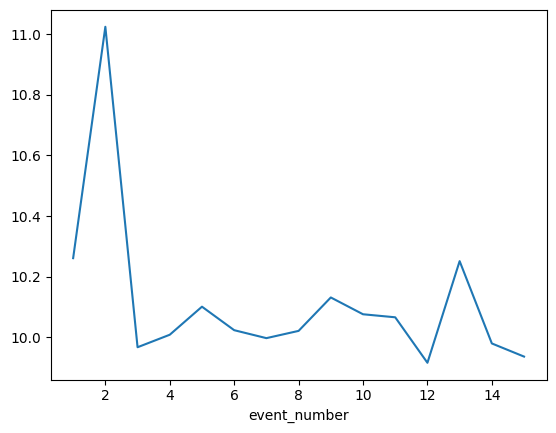

In [46]:
hombres[hombres.event_number > 0].groupby('event_number').mean(numeric_only=True).mark.plot()

<AxesSubplot: xlabel='event_number'>

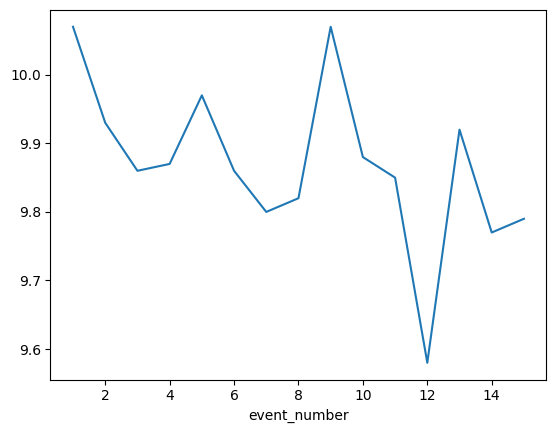

In [47]:
hombres[hombres.event_number > 0].groupby('event_number').min(numeric_only=True).mark.plot()

<AxesSubplot: xlabel='event_number'>

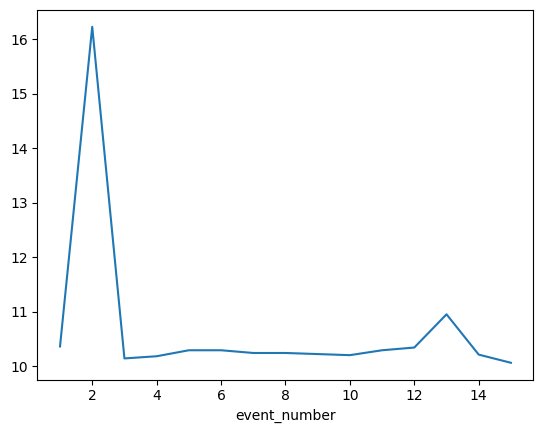

In [48]:
hombres[hombres.event_number > 0].groupby('event_number').max(numeric_only=True).mark.plot()

# Datos desde wikipedia
Para ponerle un número al event_number podemos ocupar los datos de wikipedia

In [49]:
url = "https://en.wikipedia.org/wiki/World_Athletics_Championships"
torneos = pd.read_html(url)[1]
torneos

,Edition,Year,City,Country,Date,Venue,Capacity,Events,Nations,Athletes,"Top of the medal table, World Team since 2022"
0,–,1976,Malmö,Sweden,18 Sep,Malmö Stadion,30000,1.0,20.0,42,Soviet Union
1,–,1980,Sittard,Netherlands,14 – 16 Aug,De Baandert,22000,2.0,22.0,42,East Germany
2,1st,1983,Helsinki,Finland,7 – 14 Aug,Olympiastadion,50000,41.0,153.0,1333,East Germany
3,2nd,1987,Rome,Italy,28 Aug – 6 Sep,Stadio Olimpico,60000,43.0,156.0,1419,East Germany
4,3rd,1991,Tokyo,Japan,23 Aug – 1 Sep,National Stadium,48000,43.0,162.0,1491,United States
5,4th,1993,Stuttgart,Germany,13 – 22 Aug,Neckarstadion,70000,44.0,187.0,1630,United States
6,5th,1995,Gothenburg,Sweden,5 – 13 Aug,Ullevi,42000,44.0,190.0,1755,United States
7,6th,1997,Athens,Greece,1 – 10 Aug,Olympiako Stadio,75000,44.0,197.0,1785,United States
8,7th,1999,Seville,Spain,20 – 29 Aug,Estadio de La Cartuja,70000,46.0,200.0,1750,United States
9,8th,2001,Edmonton,Canada,3 – 12 Aug,Commonwealth Stadium,60000,46.0,189.0,1602,Russia


Chao con los espacios en el nombre

In [52]:
{x:x.replace(" ","_").lower() for x in torneos.columns}

{'Edition': 'edition',
 'Year': 'year',
 'City': 'city',
 'Country': 'country',
 'Date': 'date',
 'Venue': 'venue',
 'Capacity': 'capacity',
 'Events': 'events',
 'Nations': 'nations',
 'Athletes': 'athletes',
 'Top of the medal table,  World Team since 2022': 'top_of_the_medal_table,__world_team_since_2022'}

In [59]:
(
    torneos
    .rename(columns={x:x.replace(" ","_").lower() for x in torneos.columns})
    .assign(edition = torneos.Edition.str.replace('\D','', regex=True))
)

,edition,year,city,country,date,venue,capacity,events,nations,athletes,"top_of_the_medal_table,__world_team_since_2022"
0,,1976,Malmö,Sweden,18 Sep,Malmö Stadion,30000,1.0,20.0,42,Soviet Union
1,,1980,Sittard,Netherlands,14 – 16 Aug,De Baandert,22000,2.0,22.0,42,East Germany
2,1,1983,Helsinki,Finland,7 – 14 Aug,Olympiastadion,50000,41.0,153.0,1333,East Germany
3,2,1987,Rome,Italy,28 Aug – 6 Sep,Stadio Olimpico,60000,43.0,156.0,1419,East Germany
4,3,1991,Tokyo,Japan,23 Aug – 1 Sep,National Stadium,48000,43.0,162.0,1491,United States
5,4,1993,Stuttgart,Germany,13 – 22 Aug,Neckarstadion,70000,44.0,187.0,1630,United States
6,5,1995,Gothenburg,Sweden,5 – 13 Aug,Ullevi,42000,44.0,190.0,1755,United States
7,6,1997,Athens,Greece,1 – 10 Aug,Olympiako Stadio,75000,44.0,197.0,1785,United States
8,7,1999,Seville,Spain,20 – 29 Aug,Estadio de La Cartuja,70000,46.0,200.0,1750,United States
9,8,2001,Edmonton,Canada,3 – 12 Aug,Commonwealth Stadium,60000,46.0,189.0,1602,Russia
